In [141]:
import os
import pandas as pd

bike = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [142]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [143]:
bike['datetime'] = pd.to_datetime(bike['datetime'])

bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [144]:
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
bike['minute'] = bike['datetime'].dt.minute
bike['second'] = bike['datetime'].dt.second

In [145]:
bike = bike.drop(['datetime', 'registered', 'casual'], axis=1)

In [146]:
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,0,0


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

<AxesSubplot:xlabel='second', ylabel='count'>

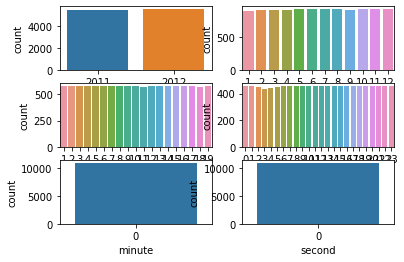

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax =plt.subplots(3,2)


sns.countplot(bike['year'], ax=ax[0, 0])
sns.countplot(bike['month'], ax=ax[0, 1])
sns.countplot(bike['day'], ax=ax[1, 0])
sns.countplot(bike['hour'], ax=ax[1, 1])
sns.countplot(bike['minute'], ax=ax[2, 0])
sns.countplot(bike['second'], ax=ax[2, 1])

In [158]:
from sklearn.model_selection import train_test_split

X = bike[['season', 'holiday', 'workingday', 'weather', 'temp',
          'atemp', 'humidity', 'windspeed', 'year', 'month', 'day',
          'hour', 'minute', 'second']].values
         
y = bike['count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 14) (8708,)
(2178, 14) (2178,)


In [159]:
import numpy as np
w = np.random.rand(8)
b = np.random.rand()

In [160]:
w

array([0.57509932, 0.4485194 , 0.60344645, 0.96933669, 0.22868009,
       0.53038769, 0.08327369, 0.39937691])

In [161]:
b

0.47132918902776044

In [162]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [163]:
model.fit(X_train, y_train)

LinearRegression()

In [164]:
predictions = model.predict(X_test)
predictions

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [165]:
def model(X, w, b):
    predictions = 0
    for i in range(8):
        predictions += X[:, i] * w[i]
    predictions += b
    return predictions

In [166]:
from sklearn.metrics import mean_squared_error

def MSE(a, b):
    mse = ((a - b) ** 2).mean() 
    return mse

mse = mean_squared_error(y_test, predictions)
mse

19945.370053754086

In [167]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  
    rmse = mse ** 0.5   
    return rmse

rmse = RMSE(predictions, y_test)
rmse

141.22807813517142

In [169]:
X = bike[['temp', 'humidity']].values
y = bike['count'].values

In [170]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [171]:
model.fit(X_train, y_train)

LinearRegression()

In [172]:
predictions = model.predict(X_test)
predictions

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [173]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

19945.370053754086

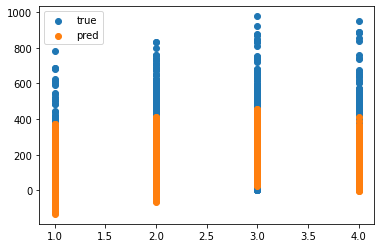

In [174]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()